<a href="https://colab.research.google.com/github/moki2744/Section_Project/blob/main/Section1_project_%EA%B9%80%EC%A2%85%EB%AA%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv', index_col='Unnamed: 0')

In [44]:
# 결측치 제거 및 Index 재정렬
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [45]:
# Year 수정
df.loc[df['Year'] <= 23, 'Year'] = df['Year']+2000
df.loc[df['Year'] <= 100, 'Year'] = df['Year']+1900

In [46]:
# 데이터에 삽입되어 있는 M 삭제
for i in range(-4, 0):
  df[df.columns[i]] = df[df.columns[i]].astype(str).str.replace('M','').astype(float,errors = 'ignore')

In [47]:
# 데이터에 삽입되어 있는 K 삭제 및 단위 변환
for i in range(-4, 0):
  les = df[df[df.columns[i]].str.contains('K')]
  les[les.columns[i]] = les[les.columns[i]].str.replace('K', '').astype(float,errors='ignore') * 0.001
  df[df[df.columns[i]].str.contains('K')] = les

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
# 데이터들의 Type을 적절한 형태로 변환
df['Year'] = df['Year'].astype(int)
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].astype(float)

# **지역에 따라서 선호하는 게임 장르가 다를까**

In [51]:
# 지역에 따라 선호하는 게임 장르가 다른가? 확인
df_region_genre = df.groupby('Genre').sum().drop('Year', axis=1)
df_region_genre.columns.name = 'Region'

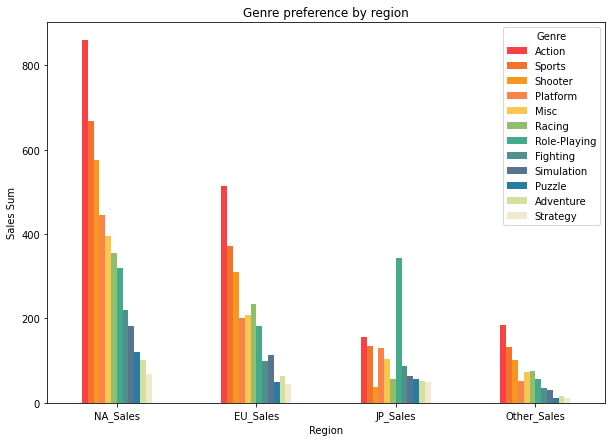

In [52]:
# 지역별 장르 선호 막대 차트 (전체 기간 판매 합계 기준)

my_colors = ['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1', '#d4e09b', '#f2e8cf']
df_region_genre.sort_values('NA_Sales', ascending=False).T.plot.bar(rot=0, figsize=(10,7), color=my_colors)
plt.title("Genre preference by region")
plt.xlabel("Region")
plt.ylabel("Sales Sum")
plt.show();

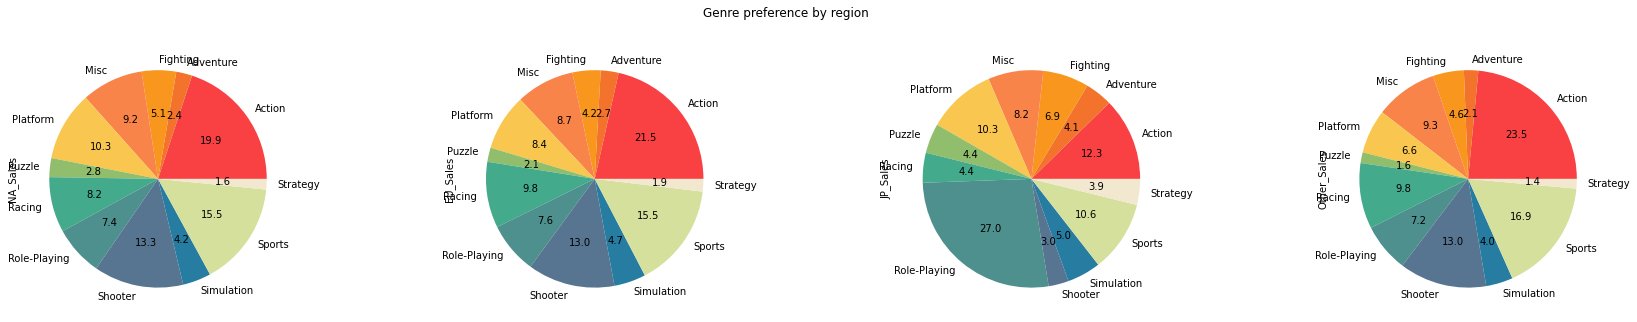

In [55]:
# 지역별 장르 선호 파이차트 (전체 기간 판매 합계 기준)
df_region_genre.plot.pie(subplots=True, legend=False, figsize=(30, 5), colors = my_colors, autopct='%.1f', title='Genre preference by region');

# **연도별 게임의 트렌드가 있을까**

Text(0, 0.5, 'Sales_Sum')

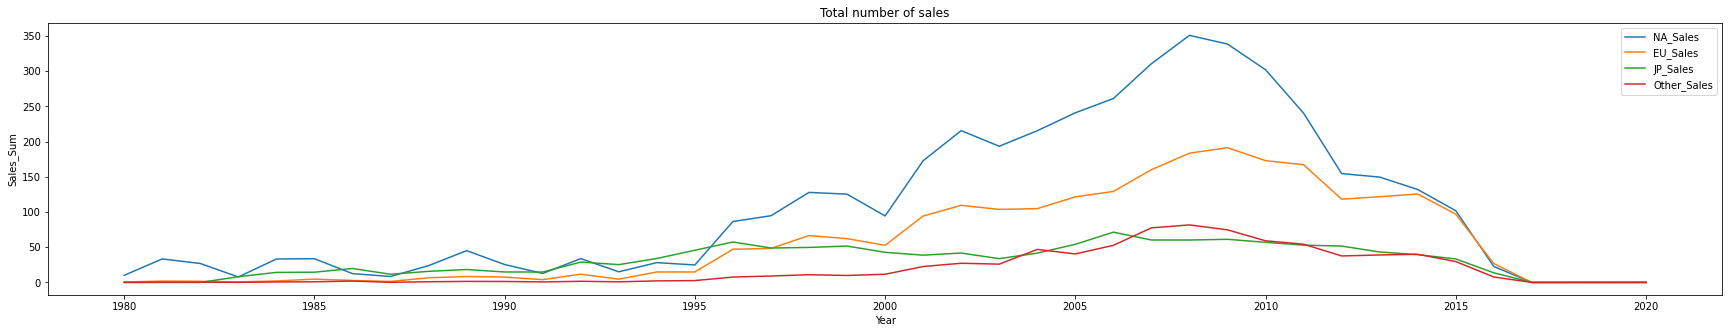

In [56]:
# 연도별 / 지역별 게임 판매량 합계 (LIne Chart)
df_year_sales = df.groupby('Year').sum()
df_year_sales.plot.line(rot=0, figsize=(30,5), title='Total number of sales')
plt.xticks()
plt.ylabel('Sales_Sum')

Text(0, 0.5, 'Sales_Sum')

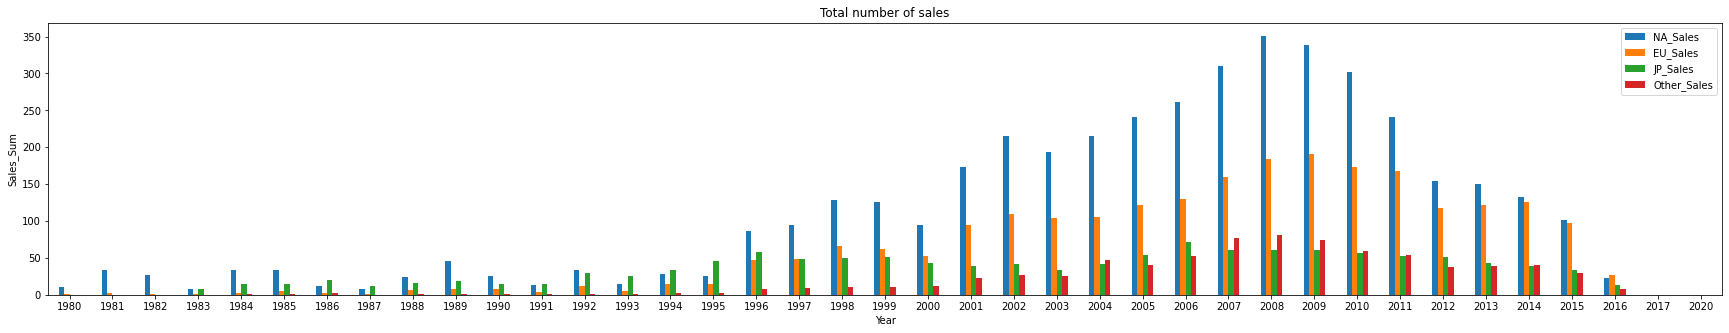

In [57]:
# 연도별 / 지역별 게임 판매량 합계 (Bar chart)
df_year_sales.plot.bar(rot=0, figsize=(30,5), title='Total number of sales')
plt.ylabel('Sales_Sum')

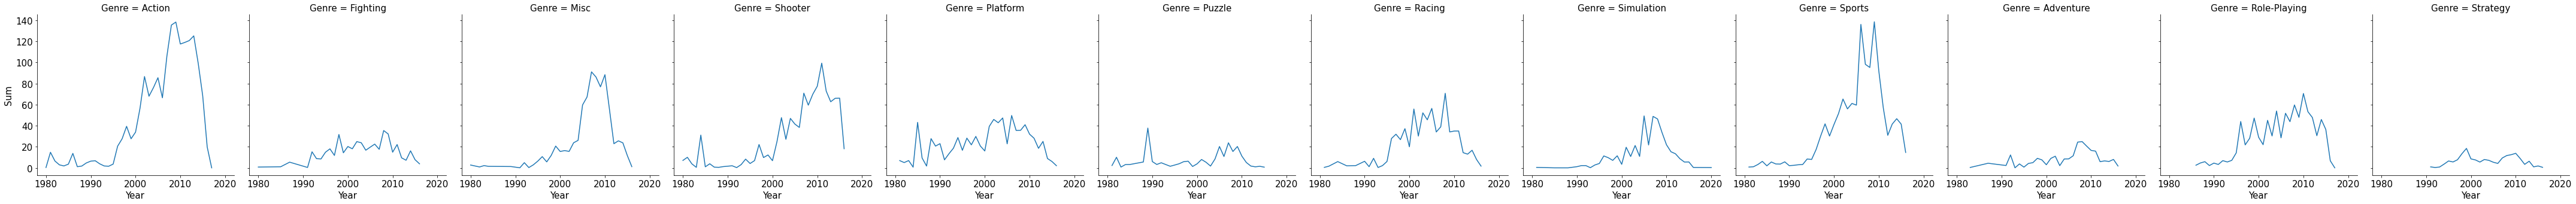

In [61]:
# 연도별 장르별 게임 판매량 합계
df['Sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_year_genre = df.groupby(['Year','Genre']).sum()
df_year_genre.reset_index(drop=False, inplace=True)
mpl.rcParams['font.size'] = 15
sns.relplot(x='Year', y='Sum', kind='line', col='Genre', data=df_year_genre)

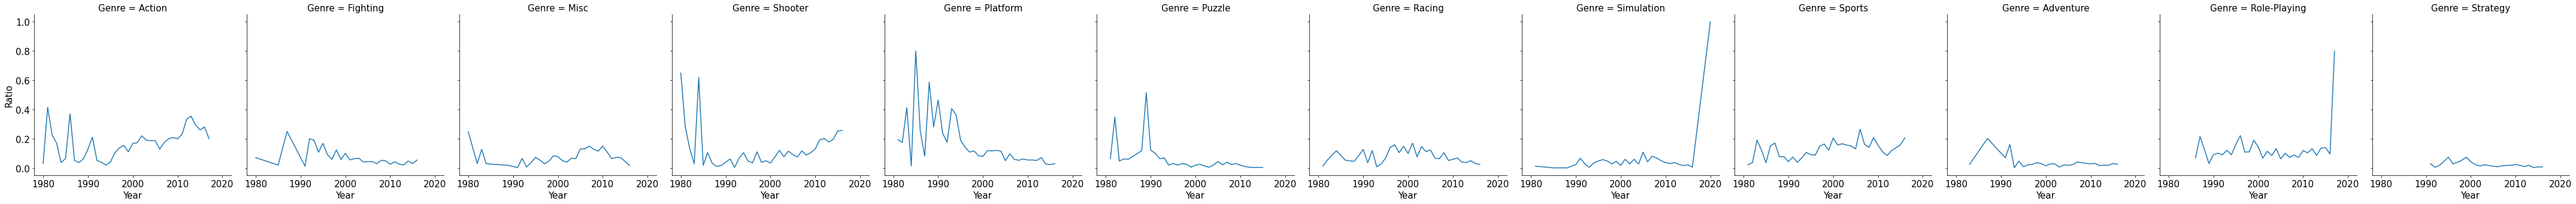

In [62]:
# 장르별 연도에 따른 판매 비율 변화
a = df_year_genre.groupby('Year').sum()
df_year_genre_ratio = pd.merge(df_year_genre, a['Sum'], on='Year', how='left')
df_year_genre_ratio['Ratio'] = df_year_genre_ratio['Sum_x'] / df_year_genre_ratio['Sum_y']

sns.relplot(x='Year', y='Ratio', kind='line', col='Genre', data=df_year_genre_ratio)

# **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [64]:
# 10M 이상 출고 게임을 출고량이 높다고 정의한다.

popular_df = df[df.Sum >= 10]
popular_genre_df = popular_df.groupby('Genre').sum().drop('Year', axis=1)

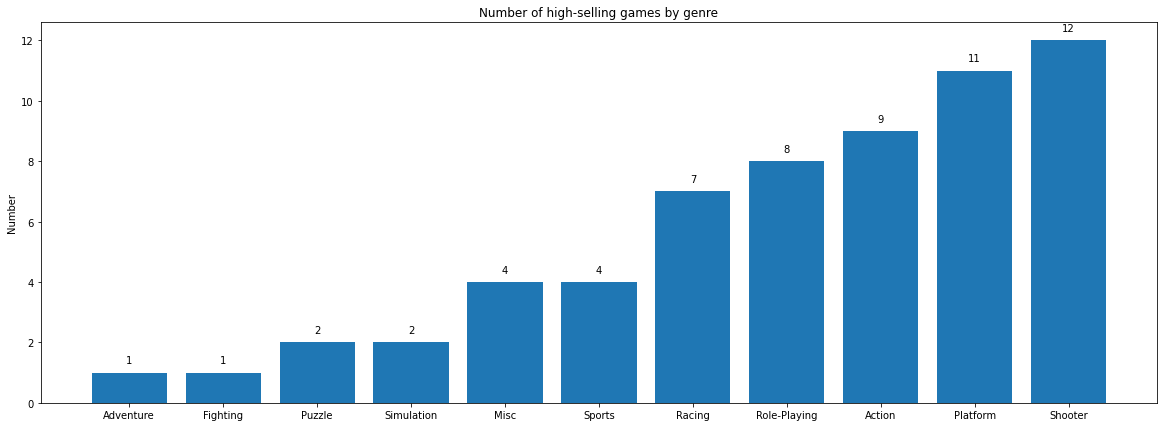

In [87]:
# 출고량이 높은 게임 장르별 갯수
popular_count = popular_df.groupby('Genre').count().drop('Year', axis=1).sort_values('Sum')
plt.figure(figsize=(20,7))
platform_mean_bar = plt.bar(popular_count.index, popular_count.Sum)
plt.title("Number of high-selling games by genre");
plt.ylabel('Number')
for idx, rect in enumerate(platform_mean_bar):
    plt.text(idx, rect.get_height() + 0.3,rect.get_height(), ha = 'center')

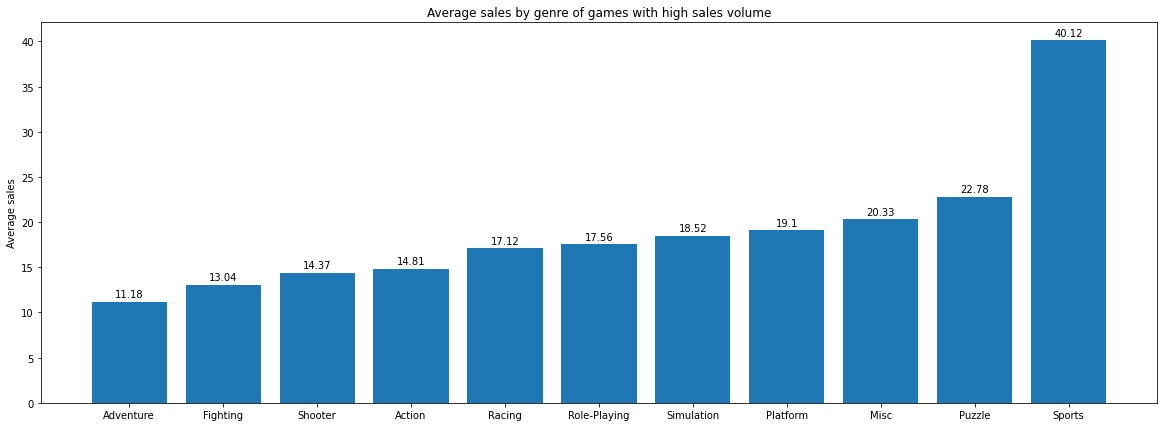

In [88]:
# 출고량이 높은 게임 장르별 평균 출고량

popular_mean = popular_df.groupby('Genre').mean().drop('Year', axis=1).sort_values('Sum')
popular_mean['Sum'] = popular_mean['Sum'].round(2)
plt.figure(figsize=(20,7))
platform_mean_bar = plt.bar(popular_mean.index, popular_mean.Sum)
plt.title("Average sales by genre of games with high sales volume");
plt.ylabel('Average sales')
for idx, rect in enumerate(platform_mean_bar):
    plt.text(idx, rect.get_height() + 0.5,rect.get_height(), ha = 'center')

Text(0, 0.5, 'Total sales')

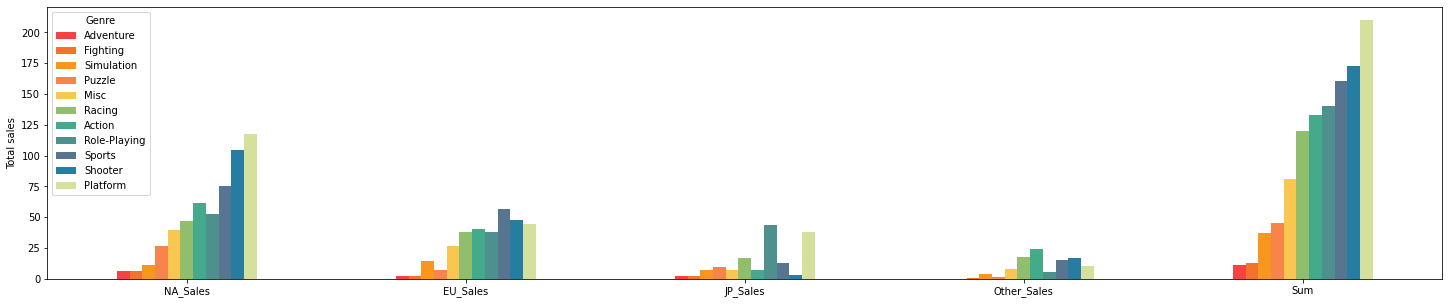

In [90]:
# 출고량이 높은 게임의 장르별 총 출고량

mpl.rcParams['font.size'] = 10
popular_genre_df.sort_values('Sum').T.plot.bar(rot=0, figsize=(25, 5), color = my_colors);
plt.ylabel('Total sales')

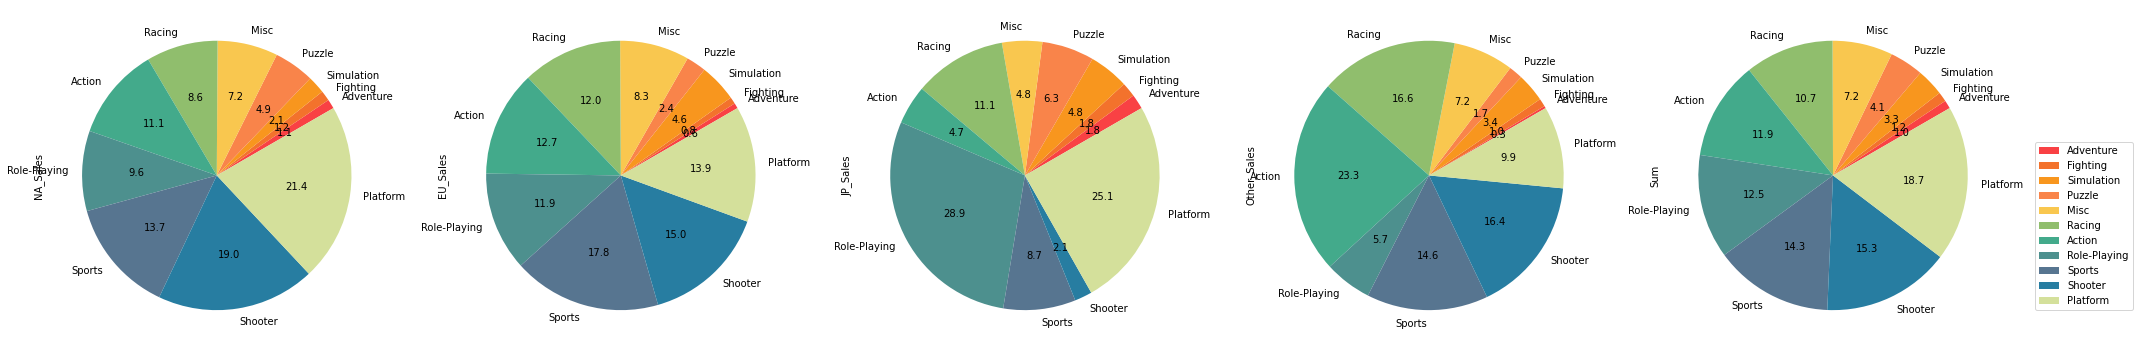

In [56]:
# 지역별 출고량이 많은 게임들이 차지하는 장르 비율
popular_genre_df.sort_values('Sum').plot.pie(subplots=True, startangle=30, legend=False, figsize=(35, 15), colors=my_colors, autopct='%.1f');
plt.legend(loc=(1.1,0.1))

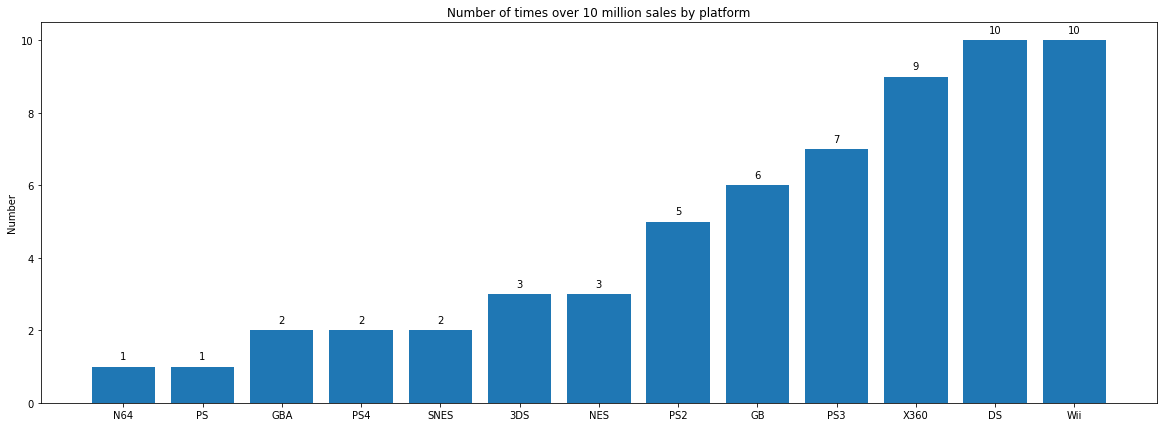

In [94]:
# 출고량이 높은 게임 중 어떤 플랫폼이 인기가 많았는지?
popular_platform = popular_df.groupby('Platform').size().sort_values()
plt.figure(figsize=(20,7))
platform_bar = plt.bar(popular_platform.index, popular_platform)
plt.title("Number of times over 10 million sales by platform");
plt.ylabel('Number')
for idx, rect in enumerate(platform_bar):
    plt.text(idx, rect.get_height() + 0.2,rect.get_height(), ha = 'center')

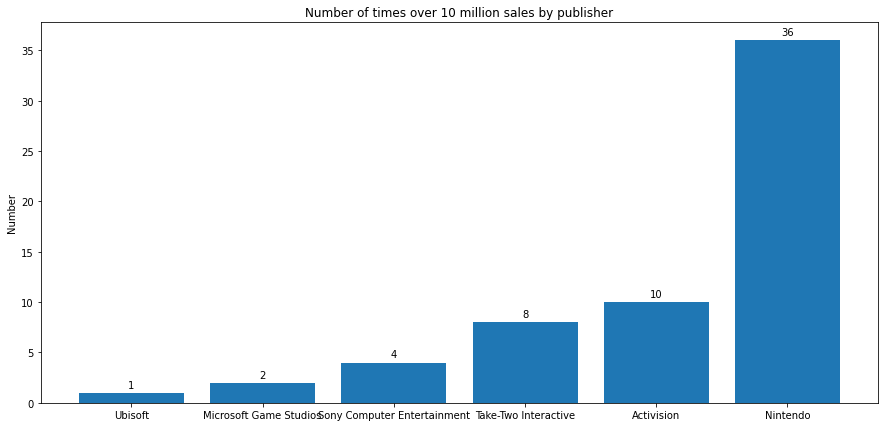

In [92]:
# 공급사 별 출고량이 높은 게임을 출시한 횟수
popular_publisher = popular_df.groupby('Publisher').size().sort_values();
plt.figure(figsize=(15,7))
bar = plt.bar(popular_publisher.index, popular_publisher)
plt.title("Number of times over 10 million sales by publisher");
plt.ylabel('Number')
for idx, rect in enumerate(bar):
    plt.text(idx, rect.get_height() + 0.5,rect.get_height(), ha = 'center')

# **PCA 분석**

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 데이터 표준화 하기
			
df_PCA = df[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']]
scaler = StandardScaler()
Z = scaler.fit_transform(df_PCA)

pca = PCA() 
pca.fit(Z)

# 표준화한 데이터에 대하여 pca 시행 
B = pca.transform(Z)
df_final = pd.DataFrame(B, columns=['pc1', 'pc2', 'pc3', 'pc4'])
df_final.index = df.index

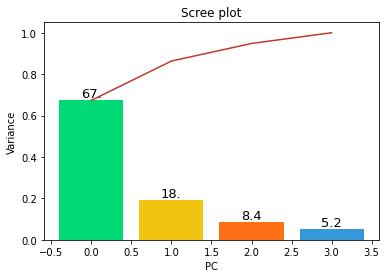

In [75]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

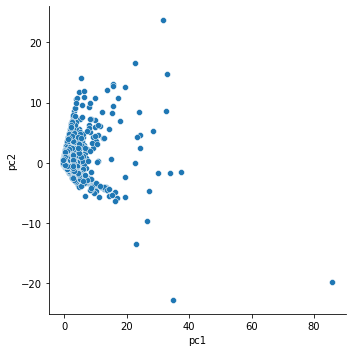

In [77]:
sns.relplot(x='pc1', y='pc2', data=df_final);